## CellPhoneDB v5 new outputs

From version 5 of [CellPhoneDB](https://www.github.com/ventolab/cellphonedb), there is a new output file - `interaction_scores`. 

According to the official repository, this table corresponds to:

`interaction_scores`: stores the new score generated. This score ranges from 0-100.
 
To score interactions CellPhoneDB v5 employs the following protocol:
 
1.    Exclude genes not participating in any interaction and those expressed in less than k% of cells within a given cell type.
2.    Calculate the mean expression (G) of each gene (i) within each cell type (j).
3.    For heteromeric proteins, aggregate the mean gene expression of each subunit (n) employing the geometric mean.
4.    Scale mean gene/heteromer expression across cell types between 0 and 100.
5.    Calculate the product of the scale mean expression of the interaction proteins as a proxy of the interaction relevance.

`cellsign`: accepts the new `CellSign` data. # TODO: ask Kevin for result description

`ktplotspy` will support these output via inclusion into the existing `plot_cpdb` function. We will gradually enable their functionality across the other functions, as well as with in the R package eventually.

**Import libraries**

In [1]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt


In [2]:
# the data is in the github folder if you clone the repo
os.chdir(os.path.expanduser("~/Documents/Github/ktplotspy"))

# read in the files
# 1) .h5ad file used for performing cellphonedb
adata = ad.read_h5ad("data/ventolab_tutorial_small_adata.h5ad")

# 2) output from cellphonedb
means = pd.read_csv("data/out_v5/degs_analysis_means_07_27_2023_151846.txt", sep="\t")
relevant_interactions = pd.read_csv("data/out_v5/degs_analysis_relevant_interactions_07_27_2023_151846.txt", sep="\t")
interaction_scores = pd.read_csv("data/out_v5/degs_analysis_interaction_scores_07_27_2023_151846.txt", sep="\t")
cellsign = pd.read_csv("data/out_v5/degs_analysis_CellSign_active_interactions_07_27_2023_151846.txt", sep="\t")


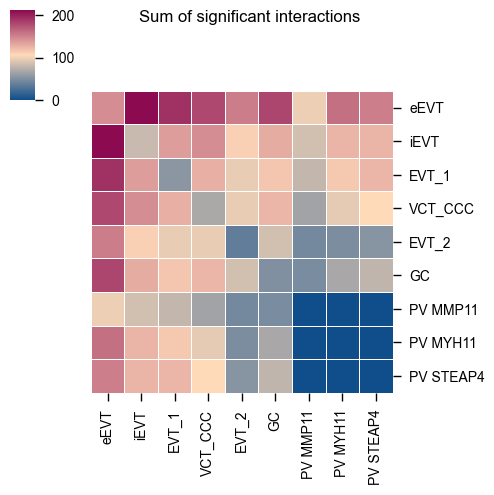

In [3]:
kpy.plot_cpdb_heatmap(pvals=relevant_interactions, degs_analysis=True, figsize=(5, 5), title="Sum of significant interactions")


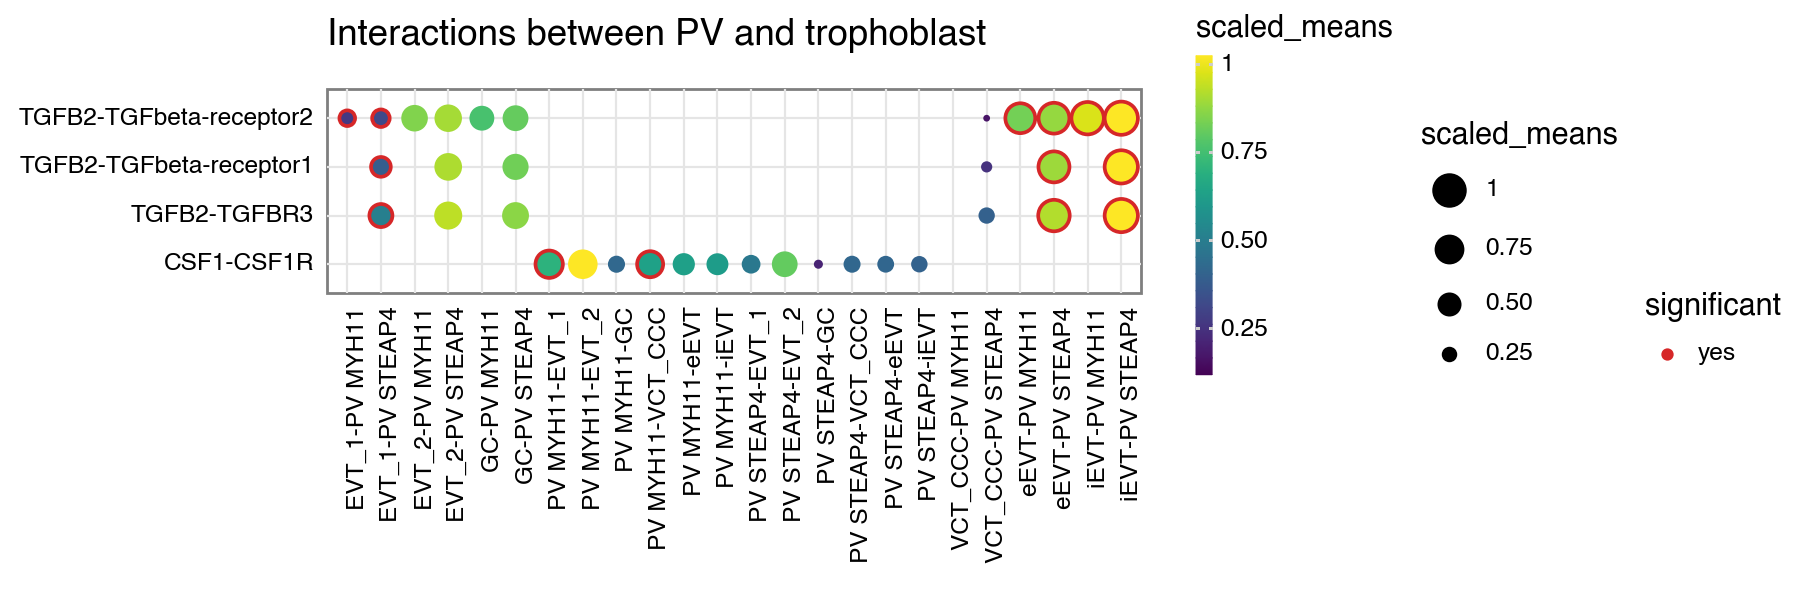

<Figure Size: (900 x 300)>

In [4]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11|PV STEAP4|PV MMPP11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R"],
    figsize=(9, 3),
    title="Interactions between PV and trophoblast ",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
)

### Interaction scores

Let's start with interaction scores. If a dataframe corresponding to the `interaction_scores` file is provided, you can toggle the alpha transparency of the interactions by the interaction score (interaction ranking is simply the score/100).

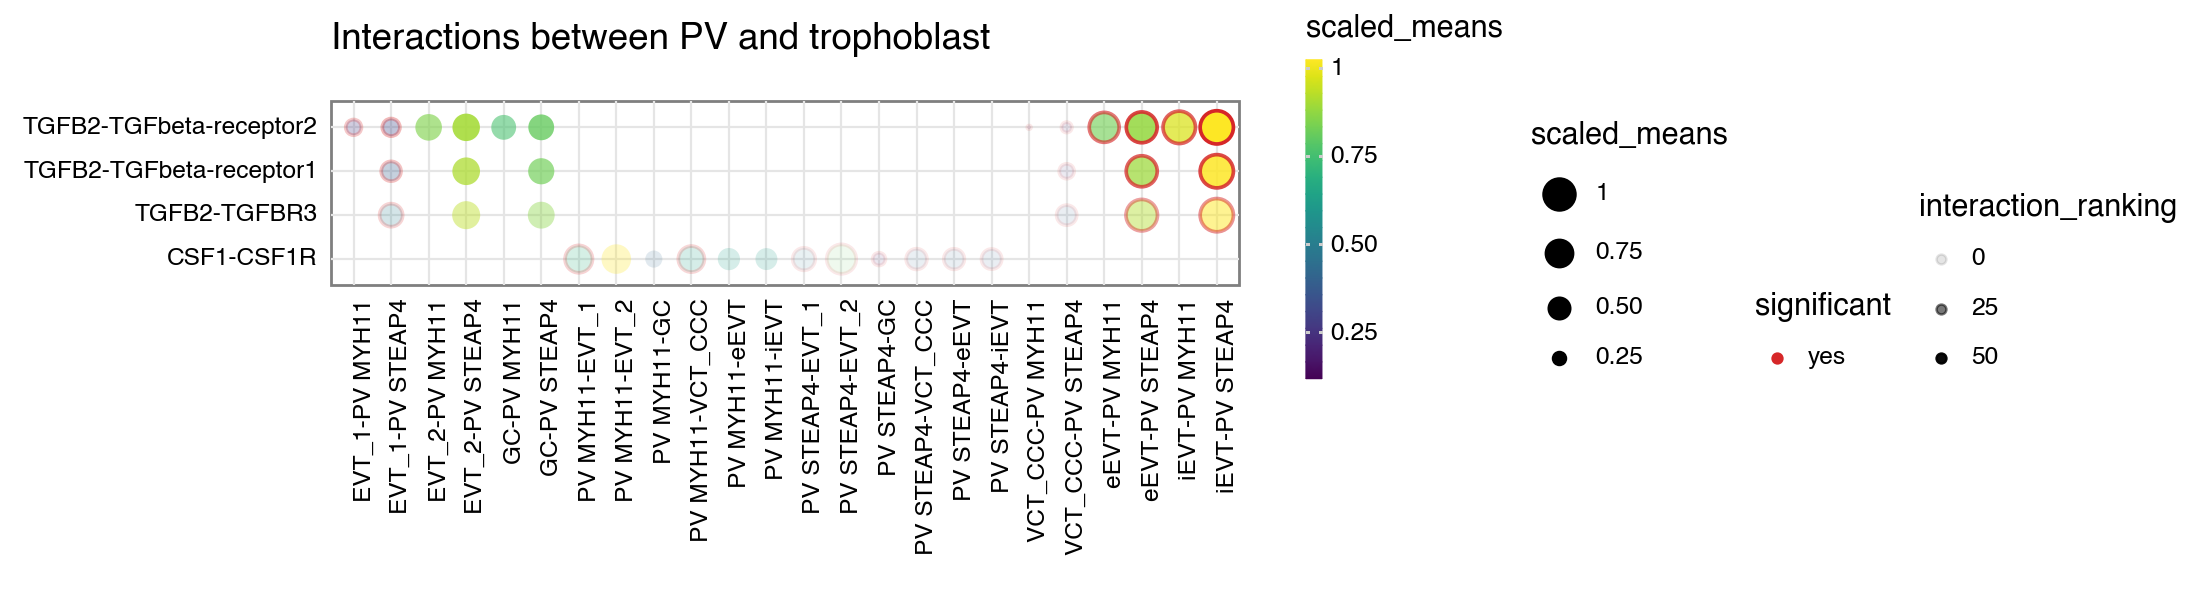

<Figure Size: (1100 x 300)>

In [5]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11|PV STEAP4|PV MMPP11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R"],
    figsize=(11, 3),
    title="Interactions between PV and trophoblast ",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
    interaction_scores=interaction_scores,
    scale_alpha_by_interaction_scores=True,
)


You can also specify a minimum interaction score to keep, removing all interactions lesser than this value.

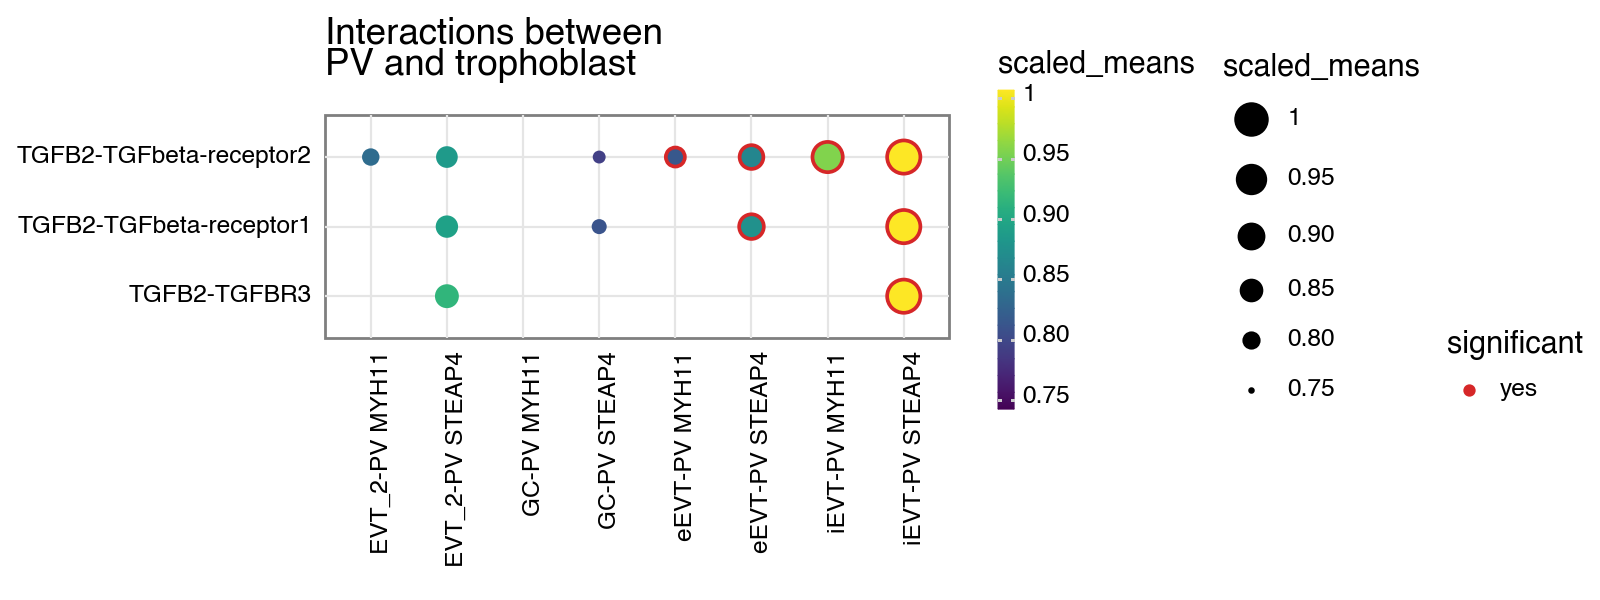

<Figure Size: (800 x 300)>

In [6]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11|PV STEAP4|PV MMPP11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R"],
    figsize=(8, 3),
    title="Interactions between\nPV and trophoblast ",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
    interaction_scores=interaction_scores,
    min_interaction_score=20,
)

or specify both to have the alpha transparacency shown too.

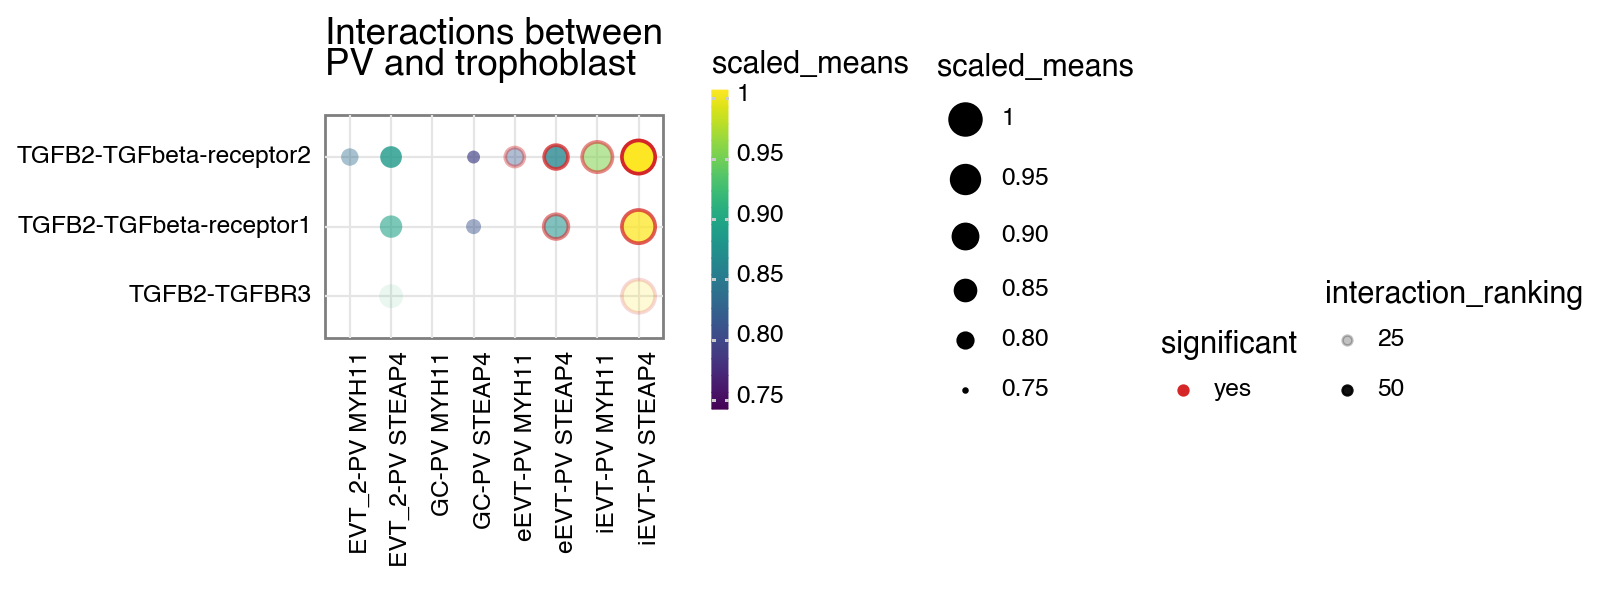

<Figure Size: (800 x 300)>

In [7]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11|PV STEAP4|PV MMPP11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R"],
    figsize=(8, 3),
    title="Interactions between\nPV and trophoblast ",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
    interaction_scores=interaction_scores,
    scale_alpha_by_interaction_scores=True,
    min_interaction_score=20,
)

### CellSign

If a dataframe corresponding to the `cellsign` file is provided, you can toggle the filter the interactions by the results

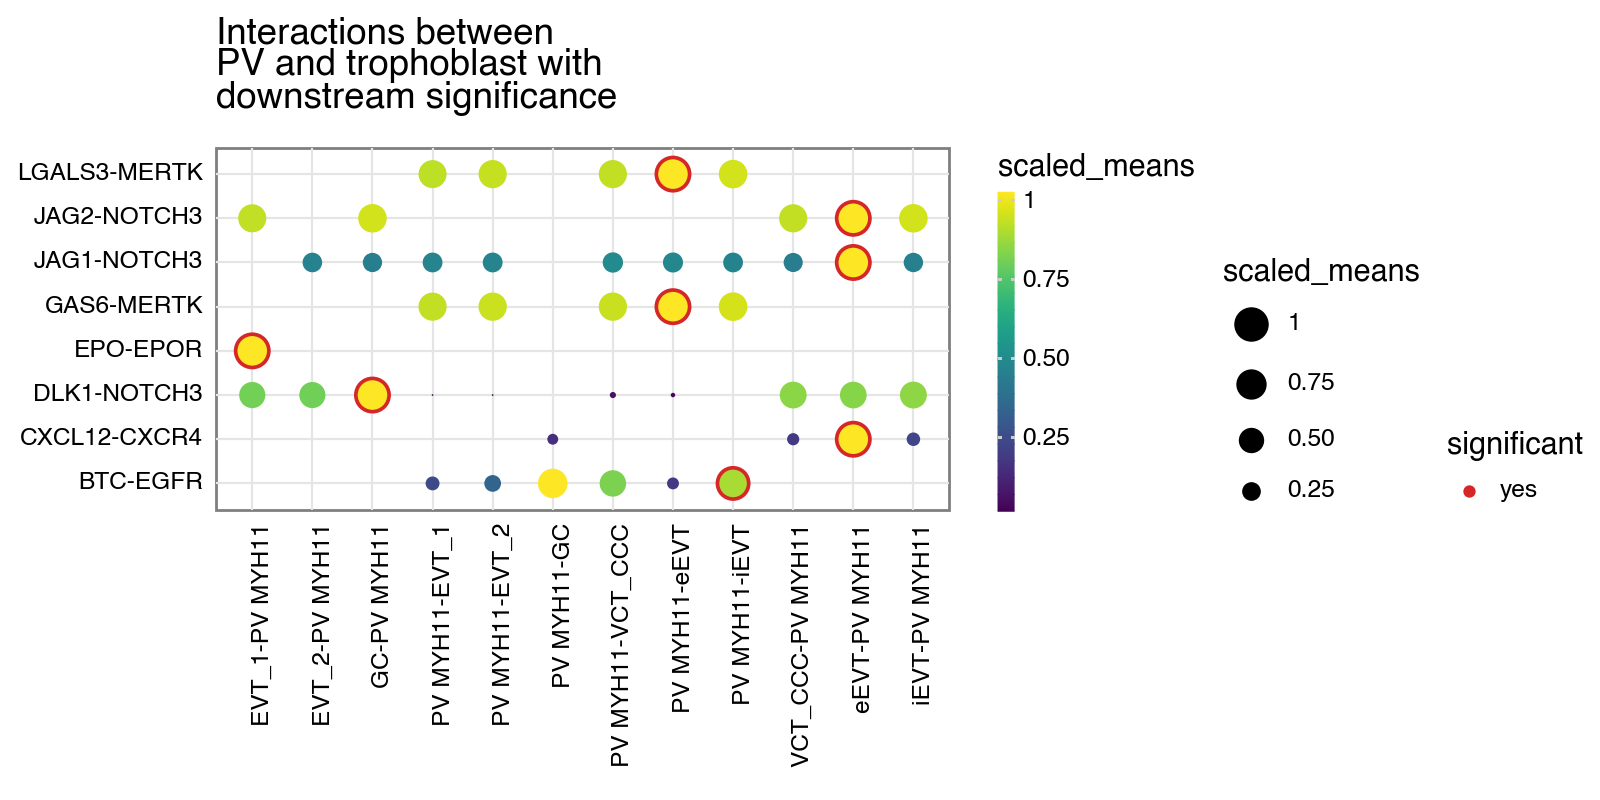

<Figure Size: (800 x 400)>

In [8]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    figsize=(8, 4),
    title="Interactions between\nPV and trophoblast with\ndownstream significance",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
    cellsign=cellsign,
    filter_by_cellsign=True
    #     scale_alpha_by_cellsign=True,
)

and also scale the alpha value (50% for 0 and 100% for 1).

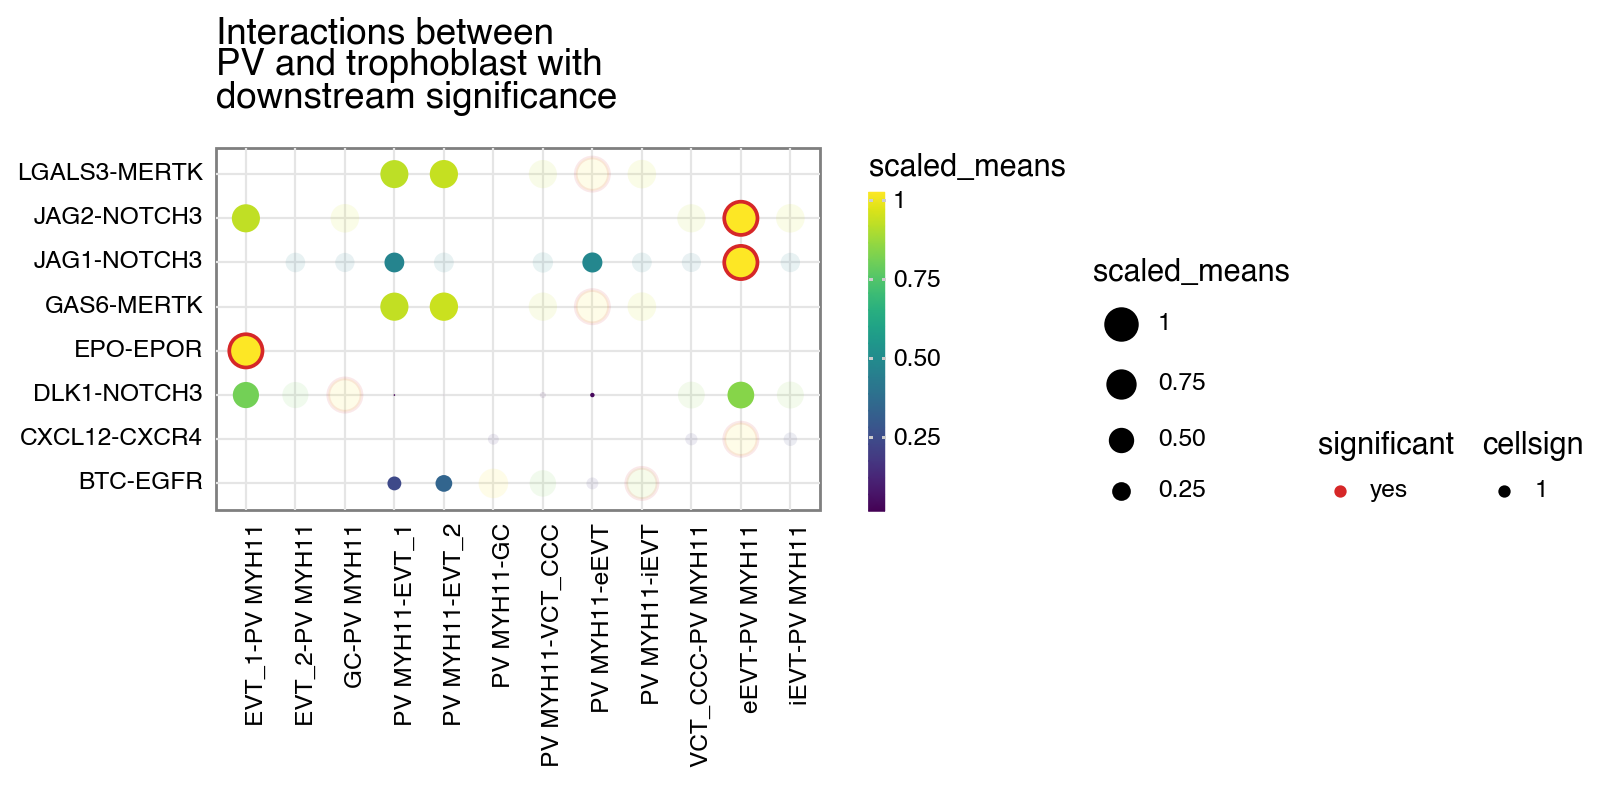

<Figure Size: (800 x 400)>

In [9]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    figsize=(8, 4),
    title="Interactions between\nPV and trophoblast with\ndownstream significance",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
    cellsign=cellsign,
    filter_by_cellsign=True,
    scale_alpha_by_cellsign=True,
)

### Additional plotting options

From now on, `is_integrin`, `directionality` and `classification` are transferred to final output table in `plot_cpdb`. This means you will be able to use something like `facet_grid`/`facet_wrap` to plot them!


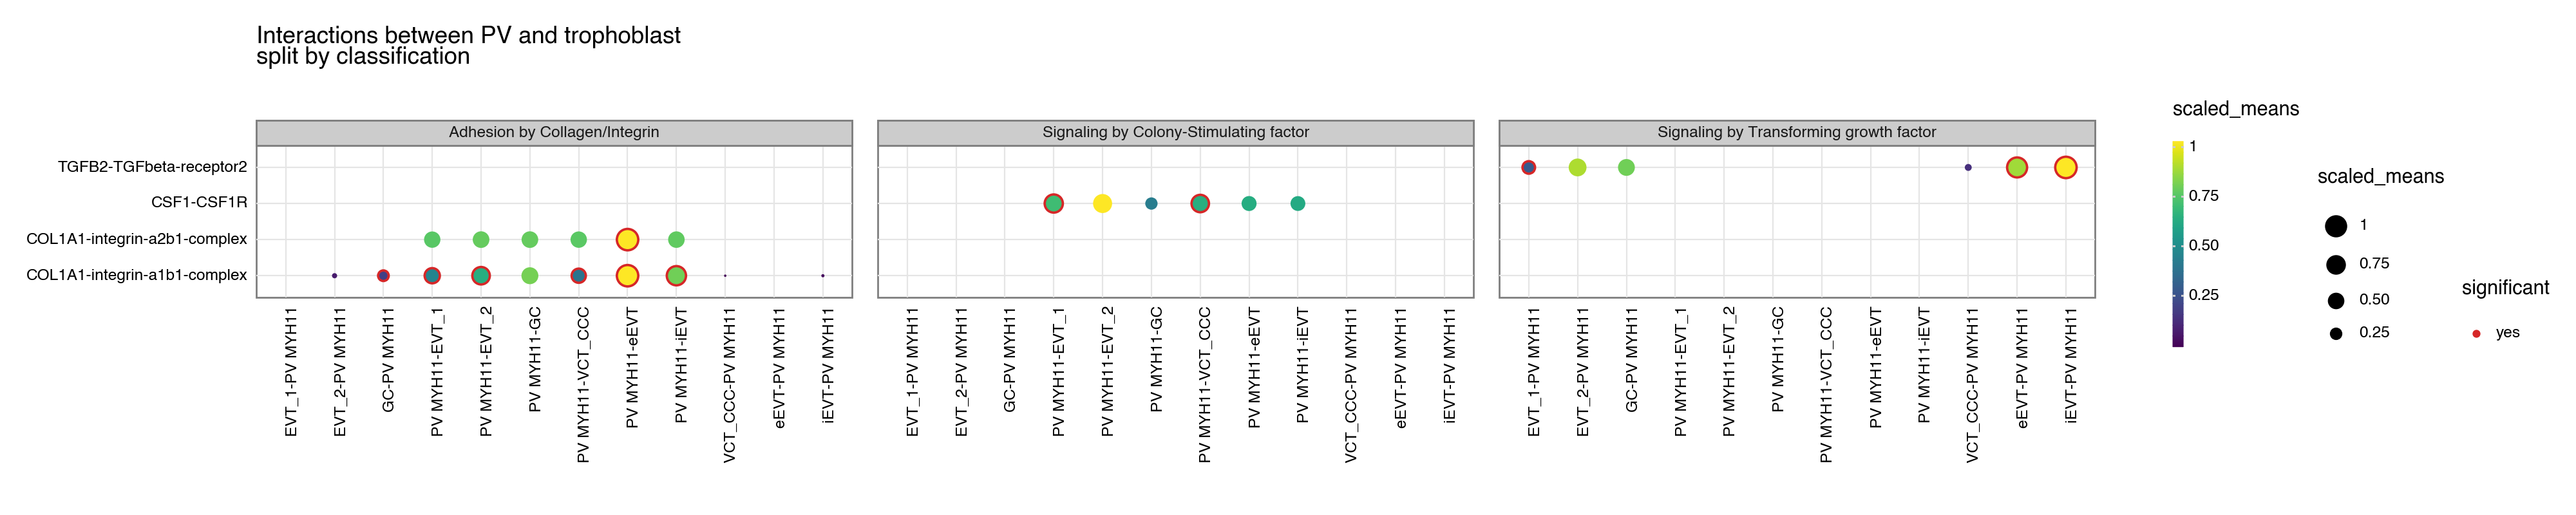

<Figure Size: (2000 x 400)>

In [10]:
from plotnine import facet_wrap

p = kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R", "COL1A1"],
    figsize=(20, 4),
    title="Interactions between PV and trophoblast\nsplit by classification",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
)
p + facet_wrap("~ classification", ncol=3)

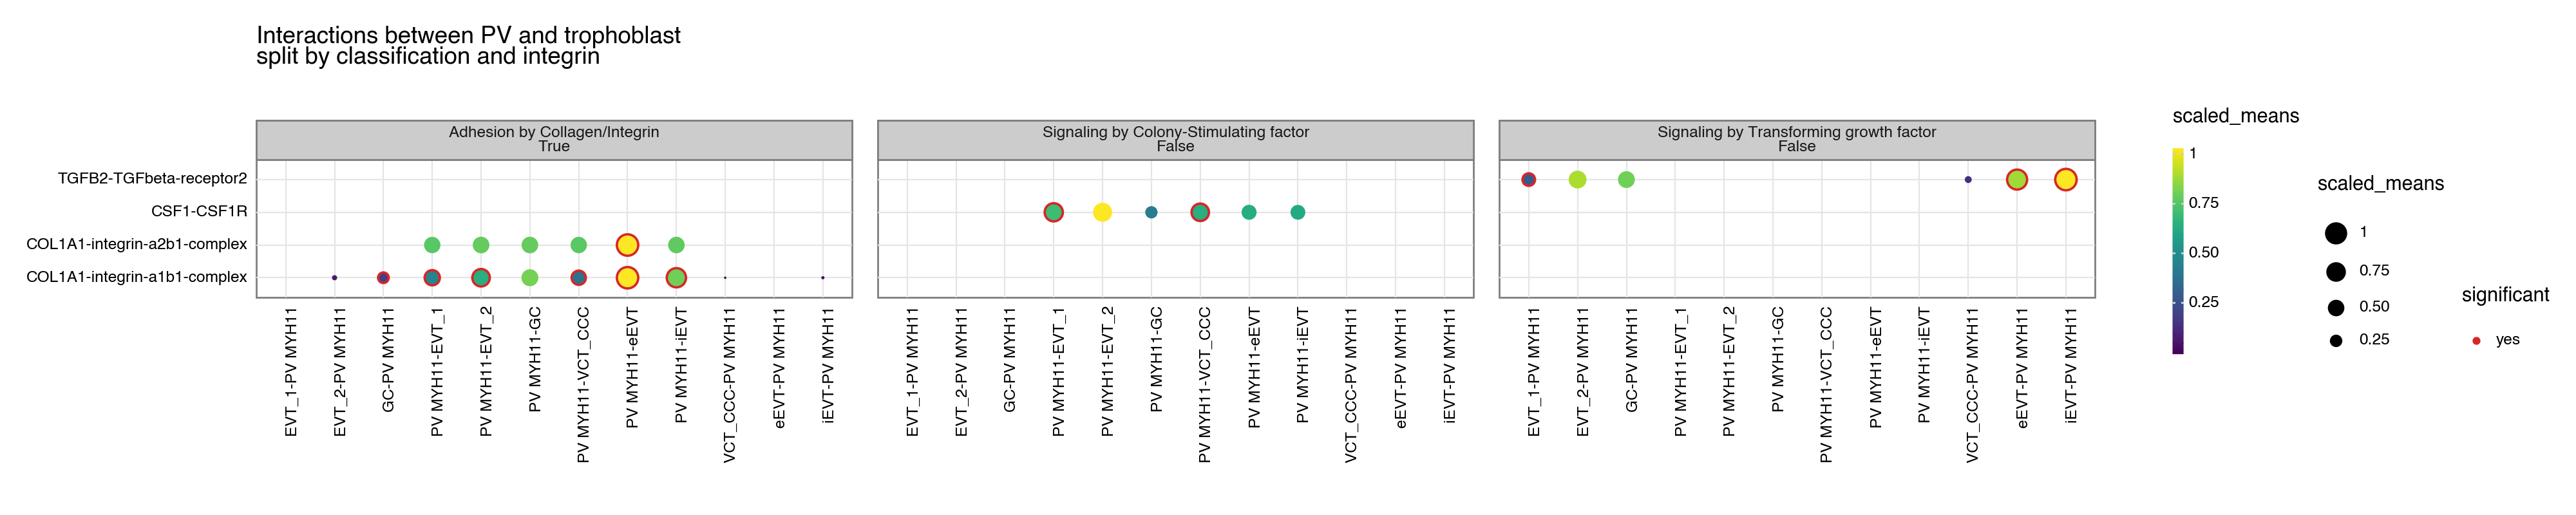

<Figure Size: (2000 x 400)>

In [11]:
p = kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R", "COL1A1"],
    figsize=(20, 4),
    title="Interactions between PV and trophoblast\nsplit by classification and integrin",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
)
p + facet_wrap("~ classification + is_integrin", ncol=3)

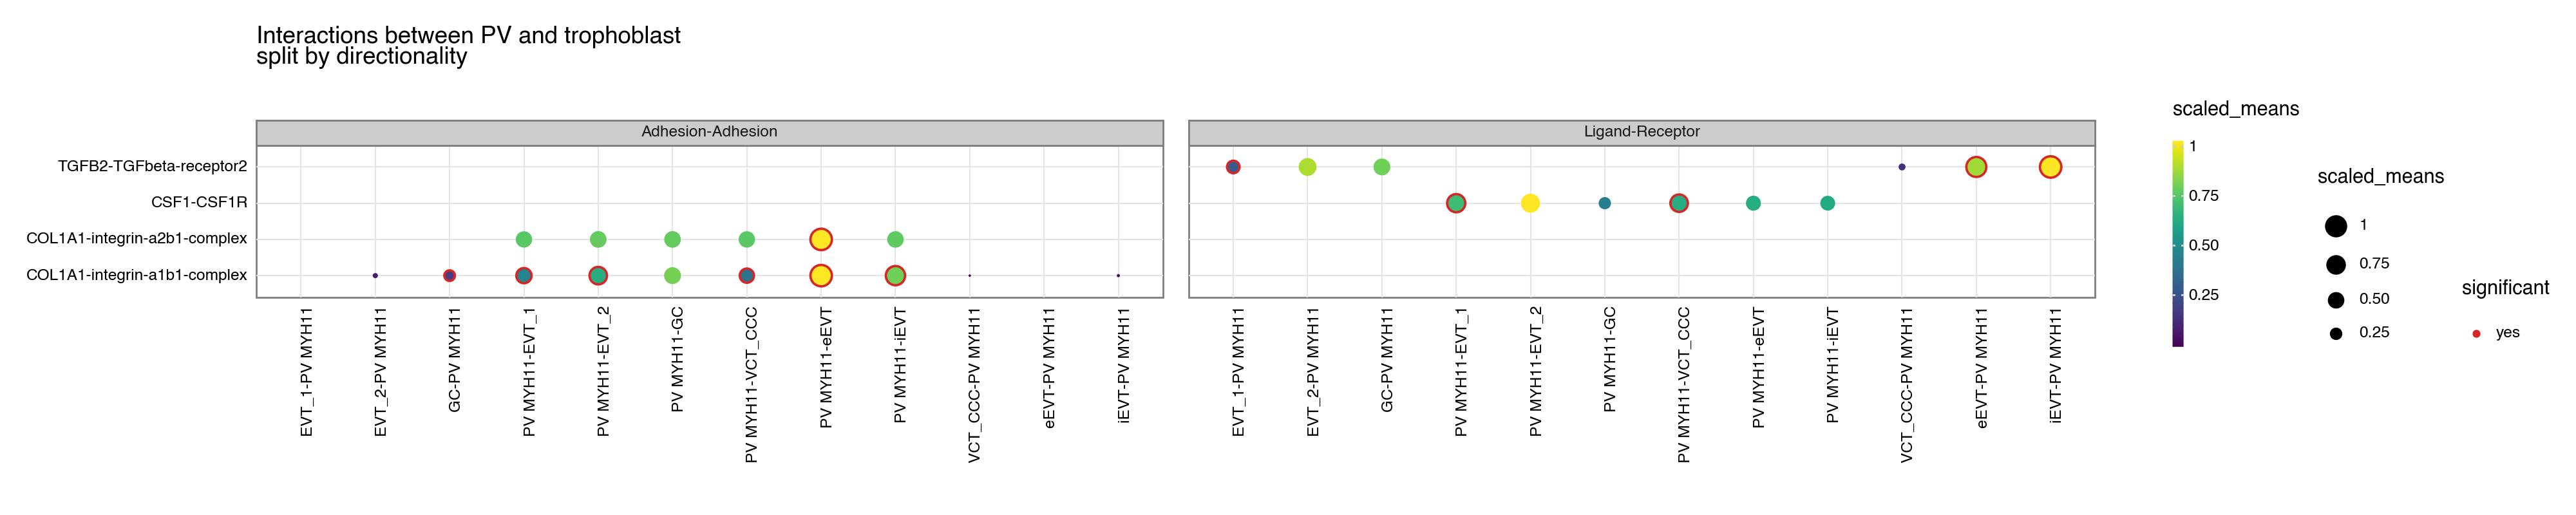

<Figure Size: (2000 x 400)>

In [12]:
p = kpy.plot_cpdb(
    adata=adata,
    cell_type1="PV MYH11",
    cell_type2="EVT_1|EVT_2|GC|iEVT|eEVT|VCT_CCC",
    means=means,
    pvals=relevant_interactions,
    celltype_key="cell_labels",
    genes=["TGFB2", "CSF1R", "COL1A1"],
    figsize=(20, 4),
    title="Interactions between PV and trophoblast\nsplit by directionality",
    max_size=6,
    highlight_size=0.75,
    degs_analysis=True,
    standard_scale=True,
)
p + facet_wrap("~ directionality", ncol=3)